# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [84]:
 pip install keras==2.5.0rc

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [86]:
from utils import get_dataset
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline  
import random
import seaborn as sns



In [87]:
#try for one file
path="/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord"
ds=get_dataset(path)
#img=ds["image"].numpy()  this one gives error : 'DatasetV1Adapter' object is not subscriptable,
#using "take" fix the problem
ls=list(ds.take(1).as_numpy_iterator())
img=ls[0]["image"] #type : numpy.ndarray
gt=ls[0]["groundtruth_boxes"] #type : numpy.ndarray
cls=ls[0]["groundtruth_classes"]
im = Image.fromarray(np.uint8(img))


INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


In [88]:
processed_tf_path="/app/project/nd013-c1-vision-starter/data/processed"
files=glob.glob(processed_tf_path)


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [89]:
#This function display img and bounding box of one tf-record file
#also return total number of cars pedestrians and bics in each frame

def display_instances(batch):
    color_code={1:[1,0,0],2:[0,1,0],4:[0,0,1] } # 1:vehicle 2:cyclist 4:pedestrians
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    cars, bic, ped = 0, 0, 0
    img=batch["image"] #this one shows img
    fig, ax=plt.subplots()
    ax.imshow(img)
    h=np.shape(img)[0]
    w=np.shape(img)[1]
    #for loop aims drawing bounding box of each class
    for i in range(len(batch["groundtruth_boxes"])):

        gt_boundingbox,gt_class = batch["groundtruth_boxes"][i] , batch["groundtruth_classes"][i]
        y1,x1,y2,x2=gt_boundingbox*h
        #print(x1,y1)
        
        cars+=1 if gt_class==1 else 0
        bic+=1 if gt_class==4 else 0
        ped+=1 if gt_class==2 else 0
        
        width=(x2-x1) 
        height=(y2-y1) 
        xy=(x1, y1)
        draw_rec = Rectangle(xy, width, height, linewidth=1, edgecolor=color_code[gt_class], facecolor='none')
        ax.add_patch(draw_rec)
    return cars,bic, ped
        
 


INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


640

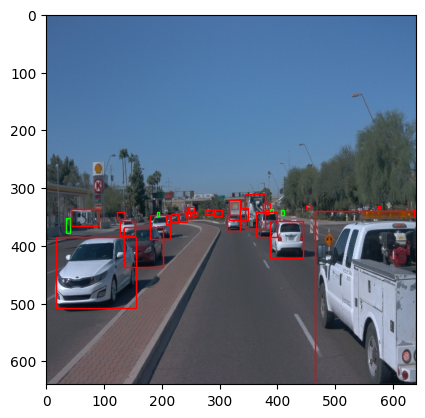

In [90]:
#try display_instances for one tfrecord :
path="/app/project/nd013-c1-vision-starter/data/processed/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord"
ds=get_dataset(path)
ls=list(ds.take(1).as_numpy_iterator())[0]
display_instances(ls)
(np.shape(ls["image"])[0])
#type(len(ls["groundtruth_boxes"]))


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

INFO:tensorflow:Reading unweighted datasets: ['/app/project/nd013-c1-vision-starter/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/nd013-c1-vision-starter/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
N. of cars : 22 N. of Pedesterians : 9 N. of bikes: 0
N. of cars : 31 N. of Pedesterians : 0 N. of bikes: 0
N. of cars : 55 N. of Pedesterians : 0 N. of bikes: 0
N. of cars : 21 N. of Pedesterians : 5 N. of bikes: 0
N. of cars : 0 N. of Pedesterians : 2 N. of bikes: 0
N. of cars : 35 N. of Pedesterians : 15 N. of bikes: 0
N. of cars : 12 N. of Pedesterians : 1 N. of bikes: 1
N. of cars : 5 N. of Pedesterians : 0 N. of bikes: 1
N. of cars : 23 N. of Pedesterians : 3 N. of bikes: 0
N. of cars : 28 N. of Pedesterians : 24 N. of bikes: 0


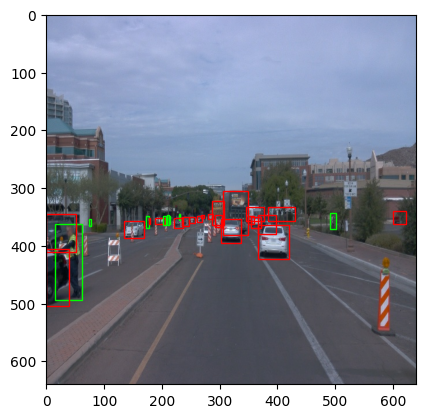

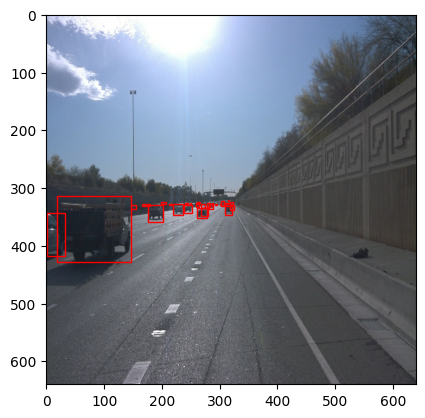

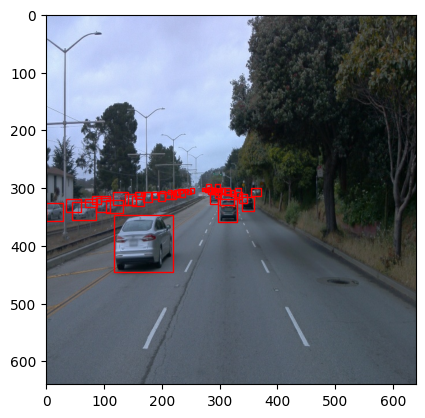

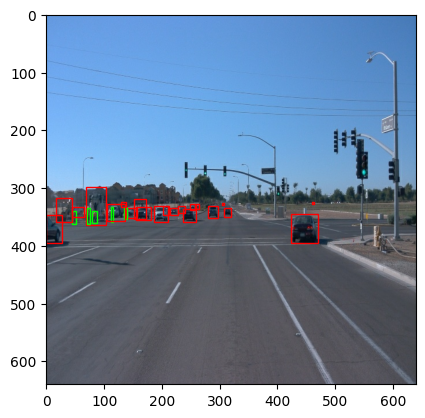

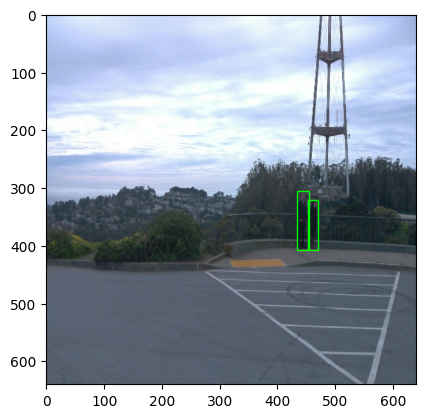

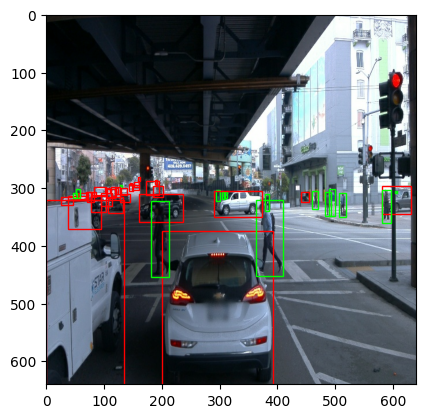

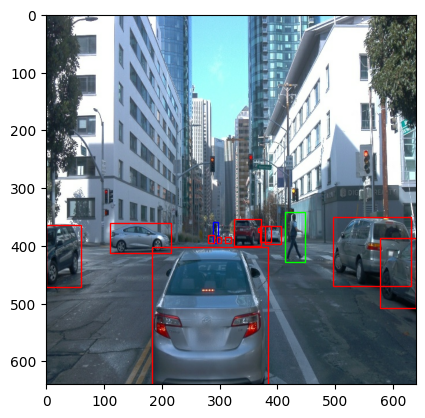

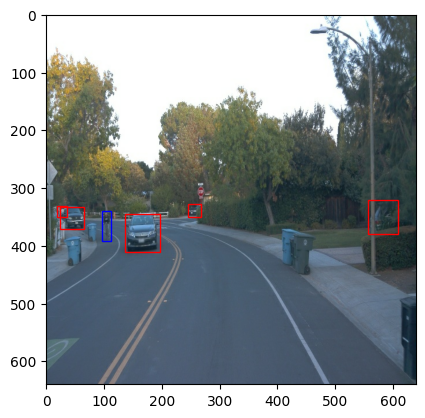

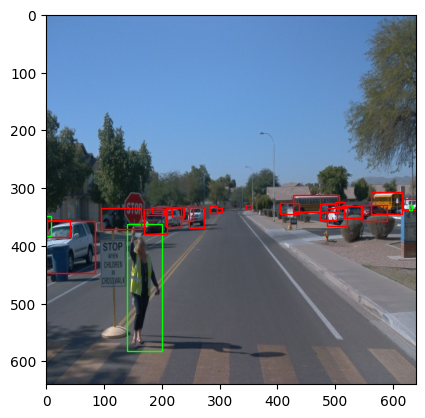

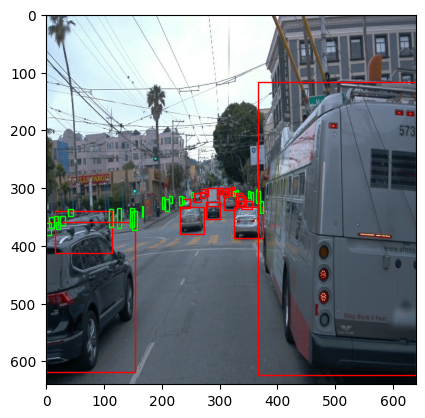

In [91]:
## display 10 images using take and shuffle 

path="/app/project/nd013-c1-vision-starter/data/processed/*.tfrecord"
files=glob.glob(path)
#files=random.shuffle(files)
ds=get_dataset(path)
tot_obj=[]
tot_cars,tot_bic,tot_ped=0,0,0
saved=[]
for i in range(10):
    #for j in range(2):
    batch=list(ds.shuffle(100).take(1).as_numpy_iterator())[0]
    # function display images and gt_boundingboxes also return total number of each class in each image
    saved.append(batch)
    cars, bic, ped = display_instances(batch)
    tot_obj.append(cars+bic+ped)
    tot_cars+=cars
    tot_bic+=bic
    tot_ped+=ped
    print("N. of cars :", cars, "N. of Pedesterians :", ped, "N. of bikes:", bic)
        
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

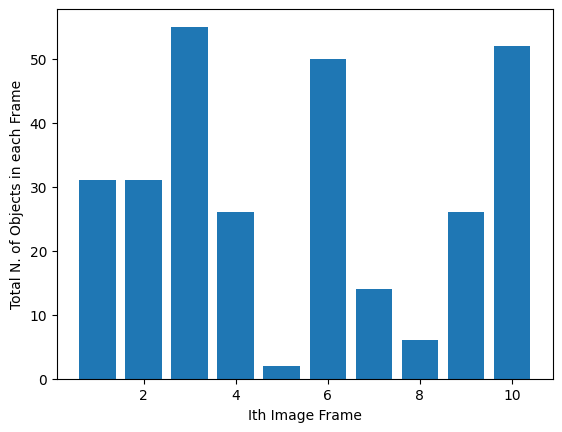

In [92]:
#tot number of objects in each batch 
tot_obj
xaxis=np.linspace(1,10, num=10, endpoint=True, dtype=int)
xaxis
plt.bar( xaxis, tot_obj)
plt.xlabel("Ith Image Frame")
plt.ylabel("Total N. of Objects in each Frame")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

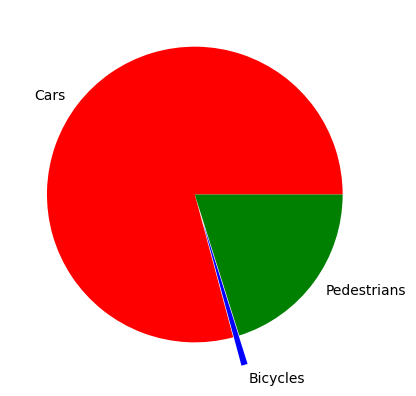

In [93]:
obj_division=[tot_cars, tot_bic, tot_ped]
color_bar=["red", "blue", "green"]
plt.pie(obj_division, labels=["Cars", "Bicycles", "Pedestrians"], explode=[0, 0.2 ,0], colors=color_bar)
plt.show

In [94]:
################################################################################################################
# Reference of last two cells of the Code                                                                   ####
# Udacity - Nano degree for Self Driving Cars - Sensor and Camera calibration section # Image Manipulation  ####
################################################################################################################
#channelwise mean and stat of the 10 chosen frame is calculated
from PIL import Image, ImageStat
means, stds=[], []

for x in range(10):
    img= Image.fromarray(saved[x]["image"])
    stat=ImageStat.Stat(img)
    mean=np.array(stat.mean)
    std=stat.stddev or stat.var**0.5
    means.append(mean)
    stds.append(std)
total_mean=np.mean(means, axis=0)       # this is totatl mean of the chosen batch
total_std=np.mean(stds)                 # this is total std of the chosen batch

# Ref : UDacity / sensor an camera calibration / Image manipulation 

<AxesSubplot:ylabel='Density'>

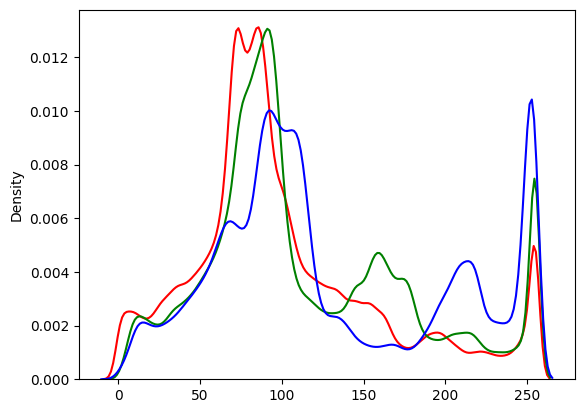

In [95]:
################################################################################################################
# Reference of last two cells of the Code                                                                   ####
# Udacity - Nano degree for Self Driving Cars - Sensor and Camera calibration section # Image Manipulation  ####
################################################################################################################
#Pixel value distribution per channel is shown

red, green, blue=[],[],[]

for x in range(10):
    img =np.array(saved[x]["image"])
    R,G,B=img[:,:,0],img[:,:,1],img[:,:,2]
    red.extend(R.flatten().tolist())
    green.extend(G.flatten().tolist())
    blue.extend(B.flatten().tolist())
sns.kdeplot(red, color='r')
sns.kdeplot(green, color='g')
sns.kdeplot(blue, color='b')

# Ref : UDacity / sensor an camera calibration / Image manipulation 
